## 1.❗Introduction
<a id="about-dataset"></a>

    Problem Statement
    You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

    Task



    Given a person’s credit-related information, build a machine learning model that can classify the credit score.

<font color='black' size='2' face='Tenor Sans'>

<a id="preparation"></a>
## 2. 🚩 Preparation

<a id="import-libraries"></a>
## 2.1 📔 Import Libraries

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id="loading-files"></a>
## 2.2 🗃️ Loading Files
<font color='black' size='2' face='Sans Serif'>

In [6]:
df = pd.read_csv('/content/drive/MyDrive/train.csv', dtype={'Column26': str})
df_test = pd.read_csv('/content/drive/MyDrive/test.csv', dtype={'Column26': str})

df

<ipython-input-6-d04aed507f7f>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/train.csv', dtype={'Column26': str})


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


<a id="data-cleaning"></a>
## 3.🧹 Data Cleaning

In [7]:
# Looks like a lot of data not in the right format. Let's fix it!

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
missing_per_column = df.isnull().sum()
print(missing_per_column[missing_per_column > 0])

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64


    There are a lot of missplaced symbols not related to data which will affect training model. Let's do some magic to adjust form



```
# This is formatted as code
```

<a id="adjust-data-format"></a>
## 3.1 📚 Adjust Data Format (+ Entry)

    Age / Loans / Delayed Payments


In [9]:
# That's a tricky one. I loop with extending code, so it solve Data Entry and Data Format issues at once.
for x in ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment']:
    df[x] = df[x].fillna('0').str.extract('(\d+)').astype(float).astype(int)



    Annual Income

In [10]:
df['Annual_Income'].min()


'10001727.0'

In [11]:
df['Annual_Income'] = df['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
df['Annual_Income'] = df['Annual_Income'].astype(float)


    Credit Limit

In [12]:
# Each column has it's own 'thing', which keep showing me errors. So I will step by step get rid of mistakes until achieving appropriate conditions

df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', np.nan)
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(0)

    Outstanding Debt

In [13]:
# As the previous one, here I am dealing with non-numeric values. Conver them into float, ignoring errors. And replacing NaN values with 0

df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str)
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(0)

    Invested Monthly

In [14]:
# Same but handling more errors

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(str)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('', '0')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(0)

    Monthly Balance

In [15]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(str)
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(0)

    Credit History Age

In [16]:
# Covert Credit History Age into Months for better model construction

def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0

df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(parse_years_and_months)

<a id="duplicates"></a>
## 3.2 👥 Dublicates

In [17]:
duplicates = df[df.duplicated()]
num_duplicates = duplicates.shape[0]

if num_duplicates == 0:
    print("There are no duplicates 👌")
else:
    print("There are", num_duplicates, "duplicates.")

There are no duplicates 👌


## 3.3 ⚖️ Data Scaling
<a id="data-scaling"></a>


In [18]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,100000.0,119.509700,6.847573e+02,14.000000,25.000000,34.000000,42.000000,8.698000e+03
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4194.170850,3.183686e+03,303.645417,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,10.761960,6.178993e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,28.779410,2.181148e+02,0.000000,8.000000,13.000000,18.000000,4.397000e+03
Changed_Credit_Limit,100000.0,10.171791,6.880628e+00,-6.490000,4.970000,9.250000,14.660000,3.697000e+01


In [19]:
# Removing rediculous top outliers (2%)

selected_columns_train = df[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']]

percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)

for column in selected_columns_train.columns:
    df = df[df[column] <= percentiles[column]]

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,85806.0,120.486003,690.067511,14.000000,25.000000,34.000000,42.000000,8698.000000
Annual_Income,85806.0,49378.620726,36478.390299,7005.930000,19294.460000,36780.030000,70825.760000,166837.640000
Monthly_Inhand_Salary,72894.0,4105.781241,3036.319177,303.645417,1623.778333,3069.091667,5899.970000,14131.123333
Num_Bank_Accounts,85806.0,5.372759,2.585031,-1.000000,3.000000,6.000000,7.000000,10.000000
Num_Credit_Card,85806.0,5.779048,5.727016,0.000000,4.000000,5.000000,7.000000,171.000000
Interest_Rate,85806.0,14.551174,8.824173,1.000000,7.000000,13.000000,20.000000,128.000000
Num_of_Loan,85806.0,7.318381,18.881665,0.000000,2.000000,3.000000,6.000000,100.000000
Delay_from_due_date,85806.0,21.033483,14.786223,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,85806.0,12.348321,6.845002,0.000000,8.000000,13.000000,18.000000,25.000000
Changed_Credit_Limit,85806.0,10.189597,6.867078,-6.490000,4.990000,9.280000,14.710000,36.970000


    That looks quite pretty ✅

<a id="data-entry"></a>
## 3.4 👾 Data Entry Plus

## 3.4.1 🗑️ Filtering trash
<a id="filtering-trash"></a>

In [21]:
df = df[df['Payment_Behaviour'] != '!@9#%8']

In [22]:
# Drop the rows containing the value '_______' in the 'Occupation' column

df = df[df['Occupation'] != '_______']
print(df['Occupation'].unique())

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [23]:
# Drop rows where 'Credit_Mix' is '_'

df = df[df['Credit_Mix'] != '_']
print(df['Credit_Mix'].unique())

['Good' 'Standard' 'Bad']


### 3.4.2 ➖ Negative Values
<a id="negative-values"></a>


In [24]:
# Negative values

selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

for column in selected_columns:
    df = df[df[column] >= 0]

## 3.4.2 🚮 Dropping Columns
<a id="dropping-columns"></a>

In [25]:
# Not useful for trainig model

columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age','Monthly_Inhand_Salary', 'Type_of_Loan']

df.drop(columns=columns_to_drop, inplace=True)

<a id="missing-values"></a>
## 3.5 🕵️ Missing Values

In [26]:
total_missing_values = df.isnull().sum().sum()

if total_missing_values == 0:
    print("There are no missing values 💅")
else:
    print("Total missing values:", total_missing_values)

There are no missing values 💅


## 4.0 🎚️ Feature Engineering
<a id="feature-engineering"></a>

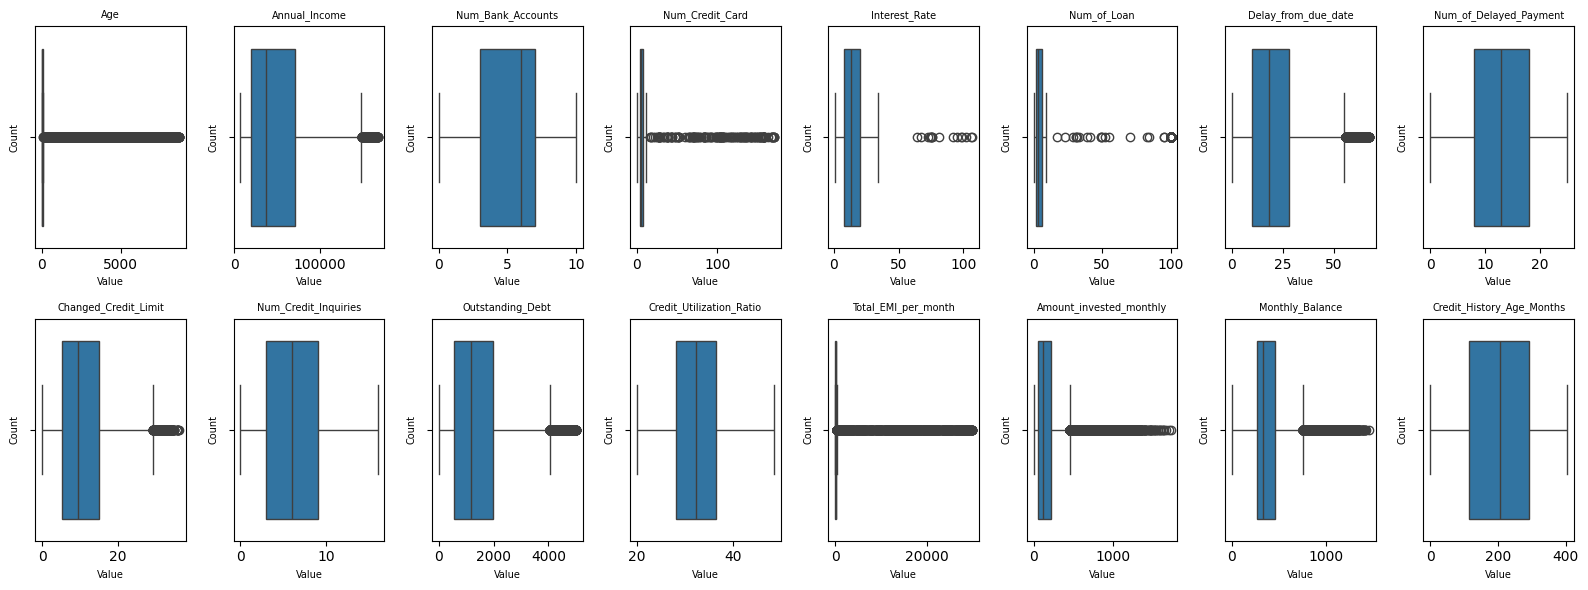

In [27]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)
    axes[i].set_xlabel('Value', fontsize=7)
    axes[i].set_ylabel('Count', fontsize=7)

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

KEY 🗝️
    ______________________________________________________________________
    
    # There are significant outliers in features like Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Outstanding_Debt, and Total_EMI_per_month.

    
    ______________________________________________________________________

##  Scaling
<a id="scaling"></a>


In [28]:
# Another step to tune best scale (subjective)

df = df[df['Age'] < 60]
df = df[df['Num_Credit_Card'] <= 10]
df = df[df['Interest_Rate'] <= 50]
df = df[df['Num_of_Loan'] <= 12]
df = df[df['Num_Bank_Accounts'] <= 10]
df = df[df['Delay_from_due_date'] <= 60]
df = df[df['Changed_Credit_Limit'] <= 30]
df = df[df['Num_Credit_Inquiries'] <= 12]
df = df[df['Total_EMI_per_month'] <= 200]
df = df[df['Outstanding_Debt'] <= 1500]

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30890.0,35.124927,11.046095,14.000000,26.000000,35.000000,44.000000,56.000000
Annual_Income,30890.0,50590.317761,35769.329245,7006.520000,21834.105000,36534.435000,72389.880000,166837.640000
Num_Bank_Accounts,30890.0,4.423567,2.303806,0.000000,3.000000,4.000000,6.000000,10.000000
Num_Credit_Card,30890.0,4.801068,1.670622,0.000000,4.000000,5.000000,6.000000,10.000000
Interest_Rate,30890.0,10.268307,5.910050,1.000000,6.000000,9.000000,14.000000,34.000000
Num_of_Loan,30890.0,2.245354,1.700307,0.000000,1.000000,2.000000,3.000000,9.000000
Delay_from_due_date,30890.0,15.011525,9.328179,0.000000,8.000000,13.000000,22.000000,60.000000
Num_of_Delayed_Payment,30890.0,10.394043,6.108735,0.000000,6.000000,11.000000,15.000000,25.000000
Changed_Credit_Limit,30890.0,8.623212,5.128232,0.000000,4.560000,8.400000,11.640000,26.900000
Num_Credit_Inquiries,30890.0,3.911266,2.815899,0.000000,2.000000,4.000000,6.000000,12.000000


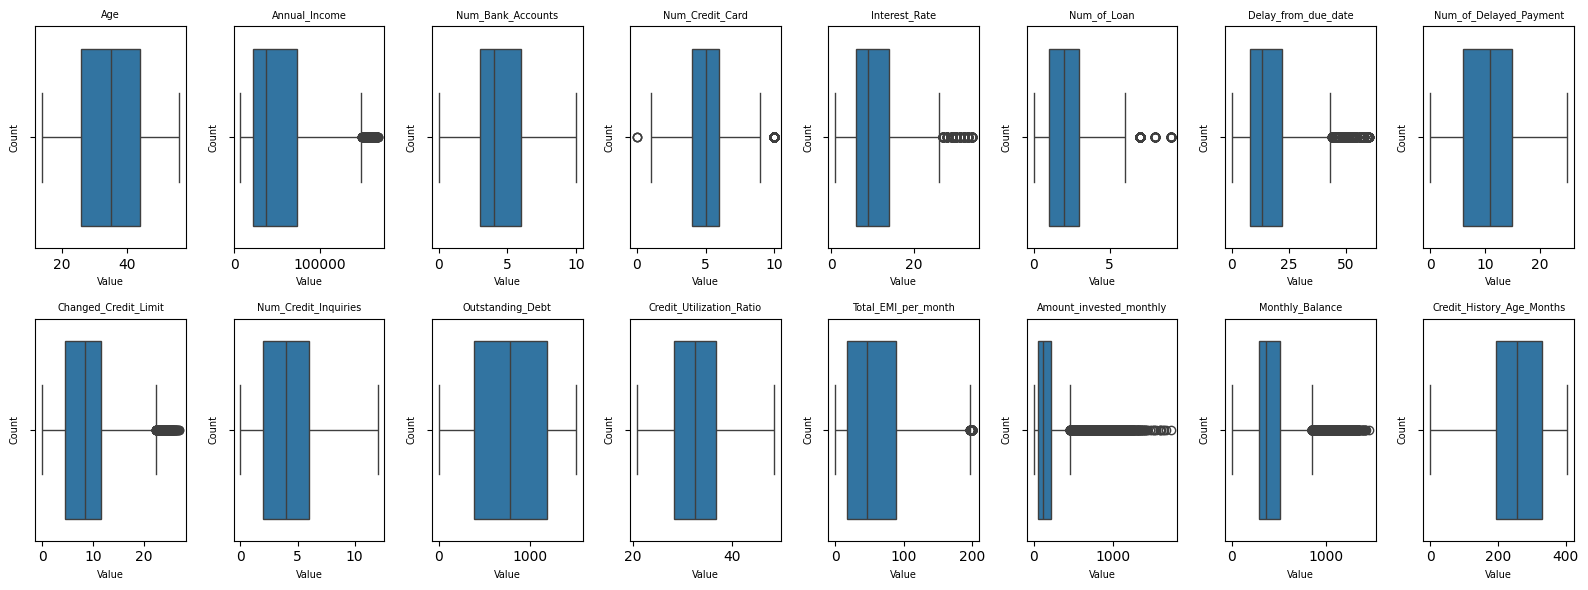

In [30]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)
    axes[i].set_xlabel('Value', fontsize=7)
    axes[i].set_ylabel('Count', fontsize=7)

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

    KEY 🗝️
    ______________________________________________________________________
    
    Decision was made while making EDA. I looked at the plots and realized, that some outliers are way beyond Standard deviation. The challenge is to choose the right scaling for modeling.
    
    ______________________________________________________________________

##Encoding
<a id="encoding"></a>


##Label Encoder
<a id="label-encoder"></a>

In [31]:
categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

df['Credit_Score_Encoded'] = encoder.fit_transform(df[['Credit_Score']])

In [32]:
# Encoding Occupation

label_encoder = LabelEncoder()
df['Occupation_Encoded'] = label_encoder.fit_transform(df['Occupation'])

##Ordinal Encoder
<a id="ordinal-encoder"></a>


In [33]:
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

df['Credit_Mix_Encoded'] = encoder.fit_transform(df[['Credit_Mix']])

In [34]:
categories_payment_behaviour = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

df['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(df[['Payment_Behaviour']])

In [35]:
# Dropping Unencoded columns
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
df.drop(columns=columns_to_drop, inplace=True)

##New Features
<a id="new-features"></a>


    It might help to increase % of accuracy and reduce amount of errors.

In [36]:
# Calculate the total number of accounts (Bank Accounts + Credit Cards)

df['Total_Num_Accounts'] = df['Num_Bank_Accounts'] + df['Num_Credit_Card']

# Calculate the total outstanding debt per account

df['Debt_Per_Account'] = df['Outstanding_Debt'] / df['Total_Num_Accounts']

# Calculate the ratio of outstanding debt to annual income

df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']

# Calculate the total number of delayed payments per account

df['Delayed_Payments_Per_Account'] = df['Num_of_Delayed_Payment'] / df['Total_Num_Accounts']

# Calculate the total monthly expenses (EMI + Monthly Investments)

df['Total_Monthly_Expenses'] = df['Total_EMI_per_month'] + df['Amount_invested_monthly']


##Mutual Information Score (MI Score)
<a id="mutual-information-score"></a>


    MI Score is a treasure! It will help you to recognize the most valuable variables for the prediction. Cool, right?

In [37]:
categorical_columns = df.select_dtypes(include=['object']).columns

data_encoded = df.copy()

encoder = OrdinalEncoder()
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

mi_scores = mutual_info_classif(X, y)

for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.004964300605555749
Feature 'Annual_Income': Mutual Information Score = 0.4279294552272739
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.05812977737378322
Feature 'Num_Credit_Card': Mutual Information Score = 0.070430728423716
Feature 'Interest_Rate': Mutual Information Score = 0.10203817093304801
Feature 'Num_of_Loan': Mutual Information Score = 0.025713527947642145
Feature 'Delay_from_due_date': Mutual Information Score = 0.06583644411851308
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.04997309110483816
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.10422487861322693
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.03201837281917563
Feature 'Outstanding_Debt': Mutual Information Score = 0.43140383761990364
Feature 'Credit_Utilization_Ratio': Mutual Information Score = 0.0008940600062685711
Feature 'Payment_of_Min_Amount': Mutual Information Score = 0.07077188032147208
Feature 'Total_EMI

In [38]:
sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]

colorscale = 'Viridis'

fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Mutual Information Score', len=0.5, y=0.2)))])

fig.update_layout(title='Mutual Information Scores for Each Feature',
                  xaxis_title='Features',
                  yaxis_title='Mutual Information Score')

fig.show()

    KEY 🗝️
    ______________________________________________________________________
    
    Annual Income: With a high Mutual Information Score of 0.430, the annual income appears to be a significant predictor of credit score rate. Generally, individuals with higher annual incomes tend to have better credit scores.

    Outstanding Debt: Another crucial factor is outstanding debt, which has a Mutual Information Score of 0.429. High levels of outstanding debt may negatively impact credit score rates.

    Debt-to-Income Ratio: This feature also demonstrates a high importance with a Mutual Information Score of 0.433. It measures the proportion of a person's debt relative to their income and is a strong indicator of creditworthiness.

    Total EMI per Month: Total Equated Monthly Installment (EMI) obligations carry a substantial weight (Mutual Information Score of 0.349) in predicting credit score rates. Higher EMI commitments might suggest higher financial stress and impact credit scores negatively.

    Interest Rate: While not as high as the debt-related features, the interest rate still holds significant importance with a Mutual Information Score of 0.100. Higher interest rates may indicate riskier borrowing behavior and could negatively influence credit scores.  
    
    ______________________________________________________________________

    ✂️ Dropping low related values for MI Score



In [39]:
# Getting rid of columns which are not important for prediction. Even so we just created new features, some of them seems to be not effective for the model
# I tried to get rid of other columns. However, the prediction accuracy was harmed by that.

columns_to_drop = [ 'Payment_of_Min_Amount', 'Monthly_Balance', 'Total_Monthly_Expenses', 'Payment_Behaviour_Encoded', 'Amount_invested_monthly', 'Credit_Utilization_Ratio', 'Occupation_Encoded']
df.drop(columns=columns_to_drop, inplace=True)

<a id="eda"></a>
## 5. 📊 EDA

## 5.1 🧱 Correlation Matrix
<a id="correlation-matrix"></a>


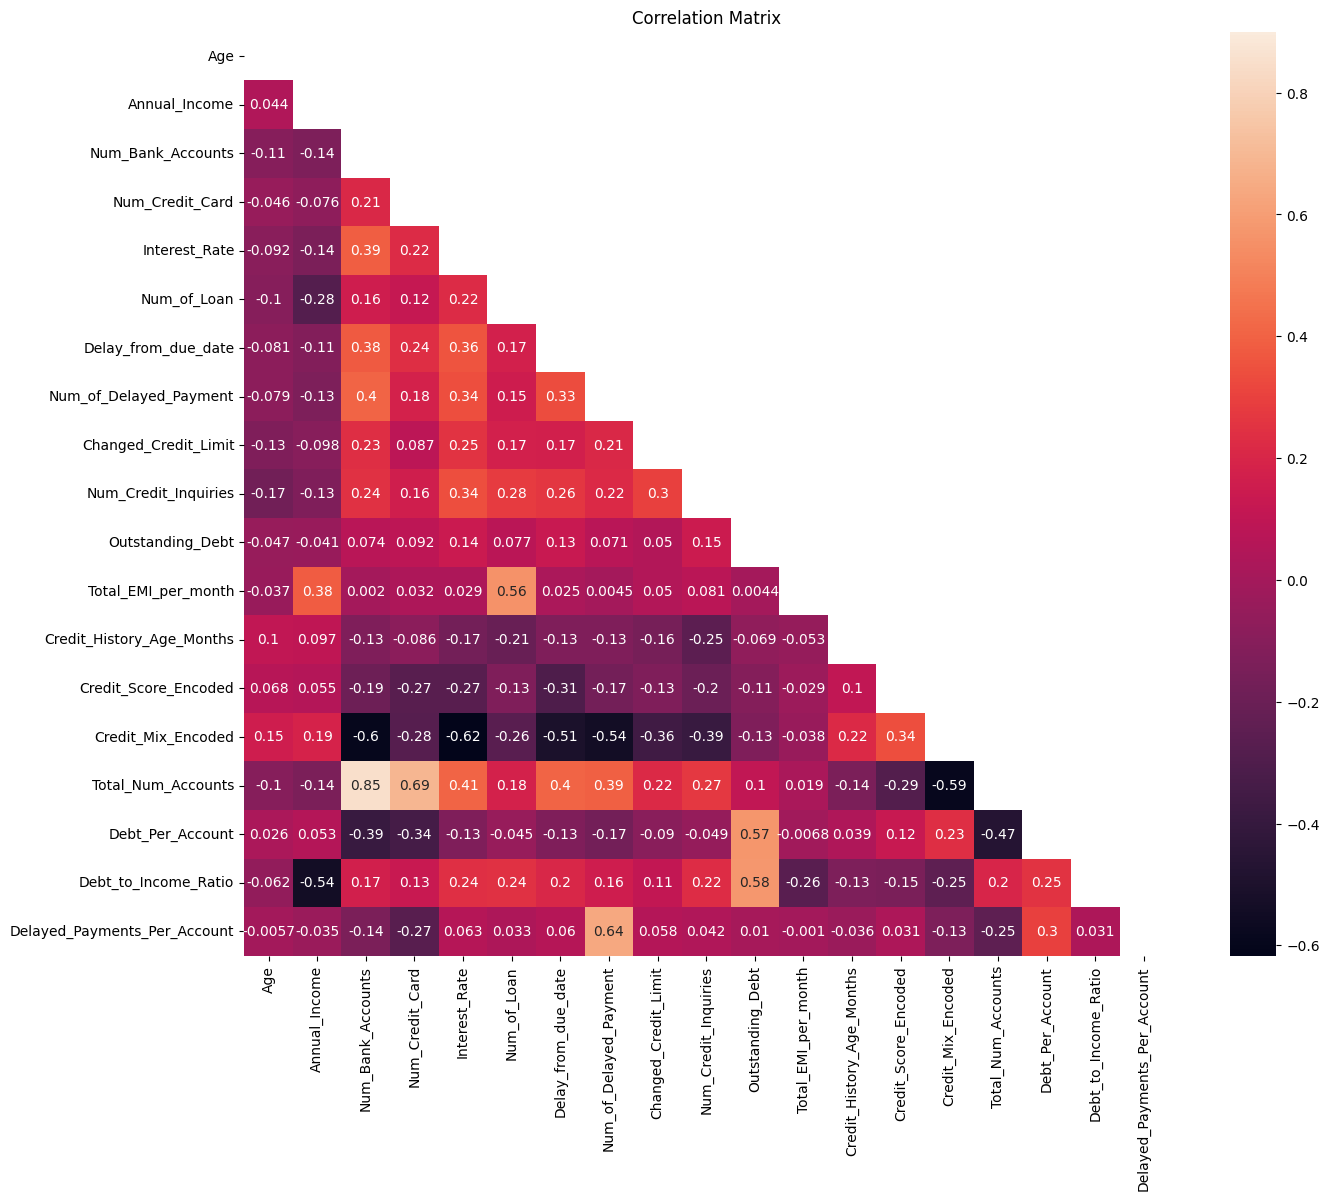

In [40]:
# Calculate Correlation Matrix

corr = df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

    KEY 🗝️
    ______________________________________________________________________
    
    Financial Stability Indicators: Features such as 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', and 'Total_Num_Accounts' demonstrate positive correlations with each other and with the Credit score. This suggests that individuals with higher annual incomes or more diverse banking and credit card accounts tend to have higher credit scores.

    Debt-related Metrics: 'Debt_to_Income_Ratio' and 'Debt_Per_Account' exhibit negative correlations with the Credit score. This indicates that individuals with higher debt-to-income ratios or greater debt per account tend to have lower credit scores. Furthermore, 'Outstanding_Debt' demonstrates a weaker negative correlation with the credit score, highlighting its impact on overall creditworthiness.

    Credit Utilization and History: 'Total_EMI_per_month', representing monthly loan repayments, shows a positive correlation with the Credit score. Additionally, features related to credit history, such as 'Credit_History_Age_Months' and 'Credit_Mix_Encoded", suggests that individuals with longer credit histories, diverse credit accounts, and timely repayments tend to have higher credit scores.

    Loan-related Factors: Features like 'Num_of_Loan' and 'Num_of_Delayed_Payment' indicate an individual's borrowing behavior and repayment patterns. This implies that individuals with fewer loan accounts or instances of delayed payments are more likely to have higher Credit scores.

    Interest Rate and Financial Behavior: 'Interest_Rate' reveals a relationship with the Credit score, suggesting that individuals with lower Interest rates on their loans may have higher Credit scores. Moreover, 'Changed_Credit_Limit' and 'Num_Credit_Inquiries' also exhibit correlations, reflecting changes in credit limits and the frequency of credit inquiries, respectively.
    
    ______________________________________________________________________

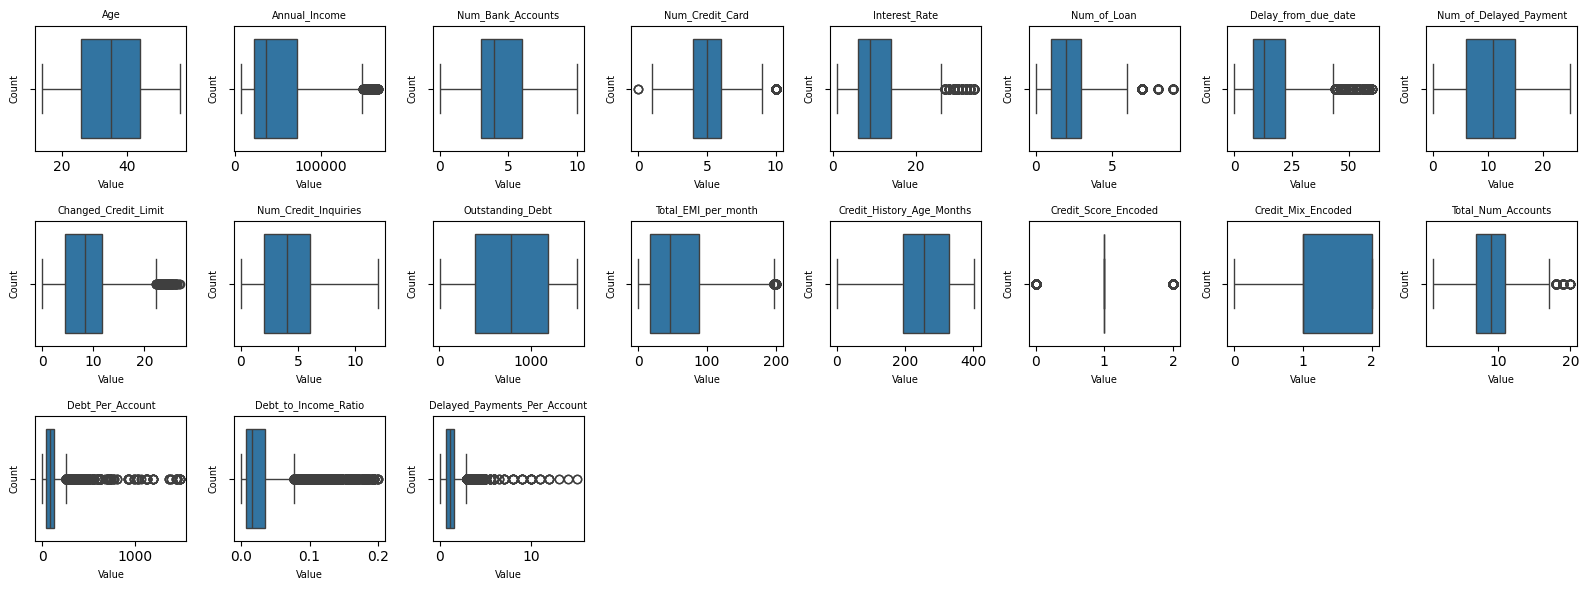

In [41]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)
    axes[i].set_xlabel('Value', fontsize=7)
    axes[i].set_ylabel('Count', fontsize=7)

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

    KEY 🗝️  
    ______________________________________________________________________
    
    Let's not Scale New Features. Farther cut only produces more errors and damage accuracy (I've leraned it the hard way...)
    ______________________________________________________________________

## 6. 🧩 Model
<a id="model"></a>


### 6.0.1 🏗️ Buildind a Model
<a id="building-model"></a>


In [42]:
y = df['Credit_Score_Encoded']

X = df[['Age','Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
       'Credit_History_Age_Months', 'Credit_Mix_Encoded', 'Total_Num_Accounts',
       'Debt_Per_Account', 'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

## 6.1 🧜‍♀️ MSE Model Fashion Show
<a id="mse-models"></a>

## 6.1.1 🌲 RandomForestRegressor
<a id="randomforestregressor"></a>


In [43]:
model = RandomForestRegressor(n_estimators=500, bootstrap=True, random_state=77)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=77)

### 6.1.1.1 ✨ Model Validation (MSE)
<a id="validation"></a>

In [44]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.15987276817349194


<a id="baseline-vs-mse"></a>
## 6.1.1.2 🎌 Baseline VS MSE

In [45]:
baseline_prediction = y_train.mean()
baseline_mse = mean_squared_error(y_test, [baseline_prediction] * len(y_test))

print("Baseline MSE:", baseline_mse)
print("MSE RFRegressor", mse)

Baseline MSE: 0.3749730269198414
MSE RFRegressor 0.15987276817349194


## 6.1.1.3 📏 Underfitting and Overfitting
<a id="underfitting-and-overfitting"></a>


    KEY 🗝️
    ______________________________________________________________________
    
    I used it in the process. After some Featuring I've realized that this part is not necessary. However, I will keep it here if you want to try it yourself

    Define the values of max_leaf_nodes for best model.
    
    ______________________________________________________________________

<a id="xgboost"></a>
## 6.1.2 🚀 XGBoost

In [46]:
xgb_model = XGBRegressor(n_estimators=3500, learning_rate=0.05, random_state=77)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xgb)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.1587969562337204


<a id="comparing-mse"></a>
## 6.1.3 📉 Comparing MSE

In [47]:
mse_rf = mean_squared_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

models = ['RandomForestRegressor', 'XGBoost']
mse_values = [mse_rf, mse_xgb]
colors = ['blue', 'green']

fig = go.Figure(data=[go.Bar(x=models, y=mse_values, marker_color=colors)])
fig.update_layout(
    title='Comparison of MSE between RandomForestRegressor and XGBoost',
    xaxis_title='Models',
    yaxis_title='Mean Squared Error (MSE)'
)
fig.show()

    KEY 🗝️
    ______________________________________________________________________
    
    Both models show the same MSE rate 🏆
    ______________________________________________________________________

<a id="smote"></a>
## 6.2.1 🔄 SMOTE vs 🌳 ForestClassifier

In [48]:
smote_params = {
    'sampling_strategy': 'auto',
    'random_state': 77,
    'k_neighbors': 5,
}

smote = SMOTE(**smote_params)

X_train = df.drop('Credit_Score_Encoded', axis=1)
y_train = df['Credit_Score_Encoded']

X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.15, random_state=77)

rf_classifier = RandomForestClassifier(n_estimators=500, bootstrap=True)

rf_classifier.fit(X_train_smote, y_train_smote)

print("Accuracy on training set:", rf_classifier.score(X_train_smote, y_train_smote))

y_pred_smote = rf_classifier.predict(X_test_smote)
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)

print("Accuracy on SMOTE test set:", accuracy_smote)

Accuracy on training set: 0.9996946129728409
Accuracy on SMOTE test set: 0.8949007844946931


## 6.2.2 🎖️ Accuracy test
<a id="accuracy-test"></a>

Accuracy on original test set: 0.9685982518614439

Classification report for SMOTE test set:
               precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      2919
         1.0       0.88      0.84      0.86      2871
         2.0       0.89      0.91      0.90      2878

    accuracy                           0.89      8668
   macro avg       0.89      0.89      0.89      8668
weighted avg       0.89      0.89      0.89      8668


Classification report for original test set:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       901
         1.0       0.98      0.96      0.97      3810
         2.0       0.95      0.98      0.96      1467

    accuracy                           0.97      6178
   macro avg       0.96      0.97      0.96      6178
weighted avg       0.97      0.97      0.97      6178



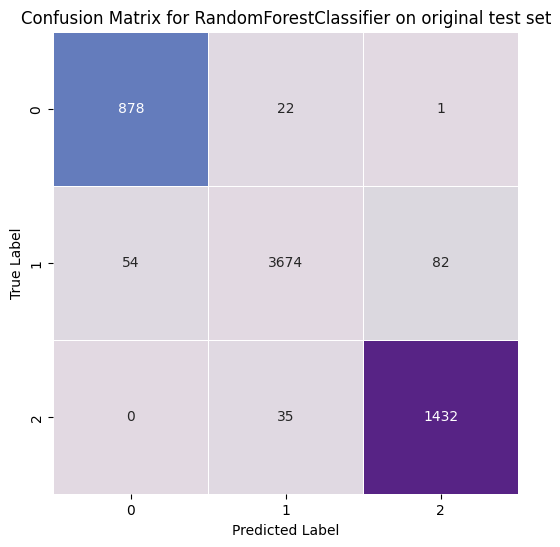

In [49]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on original test set:", accuracy)

matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cbar=False, cmap='twilight', linewidth=0.5, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for RandomForestClassifier on original test set')

print('\nClassification report for SMOTE test set:\n', classification_report(y_test_smote, y_pred_smote))
print('\nClassification report for original test set:\n', classification_report(y_test, y_pred))

    KEY 🗝️
    ______________________________________________________________________
    
    The RandomForestClassifier trained on the original test set achieves a high accuracy of approximately 97% 🥇     
    This indicates that the model performs exceptionally well in classifying the target variable 🤌  
    The RandomForestClassifier trained on the SMOTE test set achieves a slightly lower accuracy of around 90%  🥈
    Despite the lower accuracy compared to the original test set, the SMOTE model still demonstrates a respectable performance 💪
    
    ______________________________________________________________________

<a id="conclusion"></a>
## 7. ✅ Conclusion

## 7.1 🔐 KEY POINTS
<a id="KEY-POINTS"></a>

    KEY POINTS:

    
    Financial Stability Indicators:
        Features such as 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', and 'Total_Num_Accounts' demonstrate positive correlations with each other and with the Credit score. This suggests that individuals with higher annual incomes or more diverse banking and credit card accounts tend to have higher credit scores.

    Debt-related Metrics:
        'Debt_to_Income_Ratio' and 'Debt_Per_Account' exhibit negative correlations with the Credit score. This indicates that individuals with higher debt-to-income ratios or greater debt per account tend to have lower credit scores. Furthermore, 'Outstanding_Debt' demonstrates a weaker negative correlation with the credit score, highlighting its impact on overall creditworthiness.

    Credit Utilization and History:
        'Total_EMI_per_month', representing monthly loan repayments, shows a positive correlation with the Credit score. Additionally, features related to credit history, such as 'Credit_History_Age_Months' and 'Credit_Mix_Encoded", suggests that individuals with longer credit histories, diverse credit accounts, and timely repayments tend to have higher credit scores.

    Loan-related Factors:
        Features like 'Num_of_Loan' and 'Num_of_Delayed_Payment' indicate an individual's borrowing behavior and repayment patterns. This implies that individuals with fewer loan accounts or instances of delayed payments are more likely to have higher Credit scores.

    Interest Rate and Financial Behavior:
        'Interest_Rate' reveals a relationship with the Credit score, suggesting that individuals with lower Interest rates on their loans may have higher Credit scores. Moreover, 'Changed_Credit_Limit' and 'Num_Credit_Inquiries' also exhibit correlations, reflecting changes in credit limits and the frequency of credit inquiries, respectively.

In [50]:
!pip install streamlit pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [51]:
import joblib # Import the joblib module

joblib.dump(model, "model.pkl")

['model.pkl']

In [52]:
import os

file_size = os.path.getsize('model.pkl')
print(f"File size: {file_size / (1024 * 1024):.2f} MB")  # Display size in MB

File size: 240.98 MB


In [53]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

model = joblib.load("model.pkl")  # تأكد إنك رفعته مع الملفات

st.title("Credit Score Classifier")

# Replace 'age' with 'Num_Bank_Accounts'
num_bank_accounts = st.number_input("Number of Bank Accounts", min_value=0, step=1)
income = st.number_input("Annual Income", min_value=0.0, step=100.0)
num_cards = st.number_input("Number of Credit Cards", min_value=0, step=1)

if st.button("Predict"):
    df = pd.DataFrame({
        "Total_EMI_per_month": [Total_EMI_per_month], # If Total_EMI_per_month is defined else replace accordingly
        "Annual_Income": [income],
        "Num_Credit_Card": [num_cards],
        "Num_Bank_Accounts": [num_bank_accounts] # Added the new feature
    })
    result = model.predict(df)[0]
    st.success(f"Predicted Credit Score: {result}")

Writing app.py


In [54]:
selected_features = [
    "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate",
    "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment",
    "Changed_Credit_Limit", "Num_Credit_Inquiries", "Outstanding_Debt",
    "Total_EMI_per_month", "Credit_History_Age_Months", "Credit_Mix_Encoded",
    "Total_Num_Accounts", "Debt_Per_Account", "Debt_to_Income_Ratio",
    "Delayed_Payments_Per_Account"
]

X = df[selected_features]
y = df["Credit_Score_Encoded"]
model = RandomForestClassifier()
model.fit(X, y)
joblib.dump(model, "model.pkl")


['model.pkl']

In [55]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("model.pkl")

st.title("Credit Score Classifier")

# Collect inputs for all features used during training
income = st.number_input("Annual Income", min_value=0.0, step=100.0)
num_bank_accounts = st.number_input("Number of Bank Accounts", min_value=0, step=1)
num_cards = st.number_input("Number of Credit Cards", min_value=0, step=1)
interest_rate = st.number_input("Interest Rate", min_value=0.0, max_value=100.0, step=0.1)
num_loans = st.number_input("Number of Loans", min_value=0, step=1)
delay_days = st.number_input("Delay from Due Date (in days)", min_value=0, step=1)
num_delayed = st.number_input("Number of Delayed Payments", min_value=0, step=1)
changed_limit = st.number_input("Changed Credit Limit", min_value=0.0, step=10.0)
credit_inquiries = st.number_input("Number of Credit Inquiries", min_value=0, step=1)
outstanding_debt = st.number_input("Outstanding Debt", min_value=0.0, step=100.0)
emi = st.number_input("Total EMI per Month", min_value=0.0, step=100.0)
credit_history_months = st.number_input("Credit History Age (Months)", min_value=0, step=1)
credit_mix_encoded = st.selectbox("Credit Mix (Encoded)", options=[0, 1, 2])
# 0: Bad, 1: Standard, 2: Good

if st.button("Predict"):
    # Derived features
    total_accounts = num_bank_accounts + num_cards
    debt_per_account = outstanding_debt / total_accounts if total_accounts != 0 else 0
    debt_to_income = outstanding_debt / income if income != 0 else 0
    delayed_per_account = num_delayed / total_accounts if total_accounts != 0 else 0

    # Ensure correct column order and names
    df = pd.DataFrame([{
        "Annual_Income": income,
        "Num_Bank_Accounts": num_bank_accounts,
        "Num_Credit_Card": num_cards,
        "Interest_Rate": interest_rate,
        "Num_of_Loan": num_loans,
        "Delay_from_due_date": delay_days,
        "Num_of_Delayed_Payment": num_delayed,
        "Changed_Credit_Limit": changed_limit,
        "Num_Credit_Inquiries": credit_inquiries,
        "Outstanding_Debt": outstanding_debt,
        "Total_EMI_per_month": emi,
        "Credit_History_Age_Months": credit_history_months,
        "Credit_Mix_Encoded": credit_mix_encoded,
        "Total_Num_Accounts": total_accounts,
        "Debt_Per_Account": debt_per_account,
        "Debt_to_Income_Ratio": debt_to_income,
        "Delayed_Payments_Per_Account": delayed_per_account
    }])

    # Predict
    result = model.predict(df)[0]
    st.success(f"Predicted Credit Score: {result}")


Overwriting app.py


In [56]:
from google.colab import files
uploaded = files.upload()


Saving app (1).py to app (1).py


In [57]:
!ngrok authtoken 2x0PiWFDn2pGQ69dmaTE583IVdx_6eR5N4YaSnGTewWaDx7fU
from pyngrok import ngrok

# افتح نفق على بورت 8501
# public_url = ngrok.connect(port='8501') # This line is incorrect
public_url = ngrok.connect(addr='8501') # Use addr instead of port
print(f"Public URL: {public_url}")

# شغّل streamlit
!streamlit run app (1).py &>/content/logs.txt &

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Public URL: NgrokTunnel: "https://59ea-34-80-169-220.ngrok-free.app" -> "http://localhost:8501"
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `streamlit run app (1).py &>/content/logs.txt &'


In [58]:
# STEP 3: Copy uploaded app file to app.py
import shutil

# Replace with whatever the uploaded filename is (check in uploaded.keys())
shutil.copy("app (1).py", "app.py")

# STEP 4: Check if 'Age' is in the app
print("\n✅ Verifying that 'Age' exists in the form:")
!grep Age app.py || echo "❌ 'Age' not found in app.py — please check!"

# STEP 5: Kill old Streamlit server
print("\n🔪 Killing old Streamlit instances...")
!pkill streamlit

# STEP 6: Install dependencies
print("\n📦 Installing packages...")
!pip install -q streamlit pyngrok

# STEP 7: Run Streamlit in background and create public URL
from pyngrok import ngrok

print("\n🚀 Starting Streamlit server...")
!streamlit run app.py &> /content/logs.txt &

print("\n🌐 Opening tunnel...")
public_url = ngrok.connect(addr='8501')
print("🔗 Streamlit app is live at:", public_url)



✅ Verifying that 'Age' exists in the form:
credit_history_months = st.number_input("Credit History Age (Months)", min_value=0, step=1)
age = st.number_input("Age", min_value=18, max_value=100, step=1)
        "Credit_History_Age_Months": credit_history_months,
        "Age": age,

🔪 Killing old Streamlit instances...

📦 Installing packages...

🚀 Starting Streamlit server...

🌐 Opening tunnel...
🔗 Streamlit app is live at: NgrokTunnel: "https://1baf-34-80-169-220.ngrok-free.app" -> "http://localhost:8501"


In [59]:
from pyngrok import ngrok

# Start fresh Streamlit
!streamlit run app(1).py &> /content/logs.txt &

# Open a new public URL
public_url = ngrok.connect(addr='8501')
print("🔗 Your live app is here:", public_url)


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `streamlit run app(1).py &> /content/logs.txt &'
🔗 Your live app is here: NgrokTunnel: "https://a755-34-80-169-220.ngrok-free.app" -> "http://localhost:8501"


In [60]:
!pkill ngrok

In [61]:
!streamlit run app.py &>/content/logs.txt &
from pyngrok import ngrok
public_url = ngrok.connect(addr='8501')
print(f"Public URL: {public_url}")


Public URL: NgrokTunnel: "https://354f-34-80-169-220.ngrok-free.app" -> "http://localhost:8501"


In [68]:
!ngrok authtoken 2x0PiWFDn2pGQ69dmaTE583IVdx_6eR5N4YaSnGTewWaDx7fU
from pyngrok import ngrok

public_url = ngrok.connect(addr='8501')
print(f"Public URL: {public_url}")

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Public URL: NgrokTunnel: "https://2891-34-80-169-220.ngrok-free.app" -> "http://localhost:8501"


Docker Phase


In [63]:
# 2. requirements.txt
with open('requirements.txt', 'w') as f:
    f.write("streamlit\npandas\nscikit-learn\njoblib")


In [64]:
# 3. Dockerfile
dockerfile = '''
FROM python:3.9

WORKDIR /app

COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

COPY . .

EXPOSE 8501

CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0"]
'''

with open('Dockerfile', 'w') as f:
    f.write(dockerfile)


In [65]:
import zipfile

with zipfile.ZipFile("credit_score_docker.zip", "w") as zipf:
    zipf.write("app.py")
    zipf.write("requirements.txt")
    zipf.write("Dockerfile")
    zipf.write("model.pkl")


In [67]:
from google.colab import files
files.download("credit_score_docker.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>